(CVXPY) Sep 10 01:57:45 AM: Encountered unexpected exception importing solver SCIP:
NotImplementedError("PySCIPOpt (SCIP's Python wrapper) is installed and itsversion is 4.2.0. CVXPY only supports PySCIPOpt < 4.0.0.")


Text(0, 0.5, 'Enviromental')

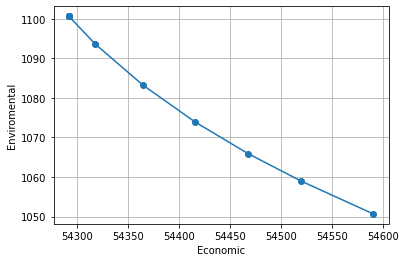

In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
pmin = [10,10,35,35,125,130]
pmax = [125,150,210,225,315,325]
a = np.diag([0.30494,0.21174,0.07092,0.05606,0.03598,0.04222])
b = [38.5390,46.1591,38.3055,40.3965,38.2704,36.3278]
alpha = np.diag([0.00838,0.00838,0.01366,0.01366,0.00922,0.00922])
beta = [0.32767,0.32767,-0.54551,-0.54551,-0.51116,-0.51116]
d = 1200

def Pareto(xi):
    p = cvx.Variable(6)
    f_ecn = 1/2*cvx.quad_form(p,a)+b@p
    f_env = 1/2*cvx.quad_form(p,alpha)+beta@p
    fo = cvx.Minimize(xi*f_ecn+(1-xi)*f_env)
    res = [sum(p) >= d , p>=pmin, p<=pmax]
    Model = cvx.Problem(fo,res)
    Model.solve()
    return [f_ecn.value,f_env.value]#print(p.value)]
points = 10
F_ecn = np.zeros(points)
F_env = np.zeros(points)

for k in range(points):
    xi = 1/(k+1)
    F_ecn[k],F_env[k]= Pareto(xi)

plt.plot(F_ecn,F_env,marker="o")
plt.grid()
plt.xlabel("Economic")
plt.ylabel("Enviromental")

In [ ]:
B = [[50, 10, 0, 0, 20, 0],
[10, 50, 0, 0, 0, 10],
[ 0, 0, 60, 0, 0, 10],
[ 0, 0, 0, 350, 20, 0],
[20, 0, 0, 20, 370, 40],
[ 0, 10, 10, 0, 40, 480]]
Bchol = 1E-3*np.linalg.cholesky(B)
z = cvx.Variable()
res = [sum(p) >= d + z**2, p>=pmin, p <= pmax]
res += [cvx.SOC(z,Bchol@p)]
ModelLPF = cvx.Problem(cvx.Minimize(obj),res)
ModelLPF.solve()
print("Generation:",np.round(p.value))
print("Flows:",np.round(s.value))

: 